<a href="https://colab.research.google.com/github/anshadap/Machine-learning-/blob/main/Aizar%20Pipes%20Market%20segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

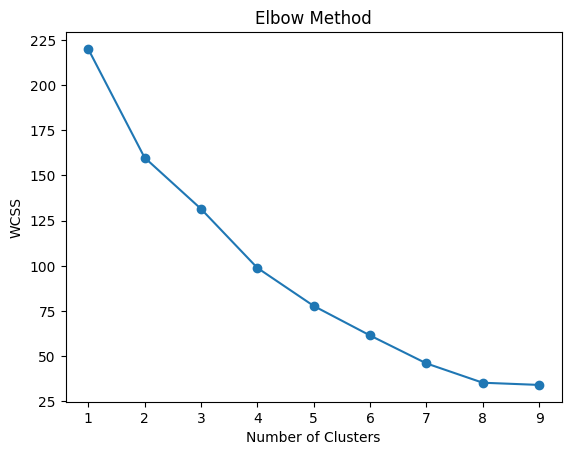

   Age  Gender  Anual income  Educational qualification  Cluster
0    1       1             1                          3        2
1    0       0             2                          1        1
2    0       0             2                          3        2
3    0       0             2                          3        2
4    0       1             2                          0        0


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df = pd.read_csv("customer_data.csv")


X = df[['Gender', 'Age', 'Anual income', 'Educational qualification']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 10), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


print(df.head())


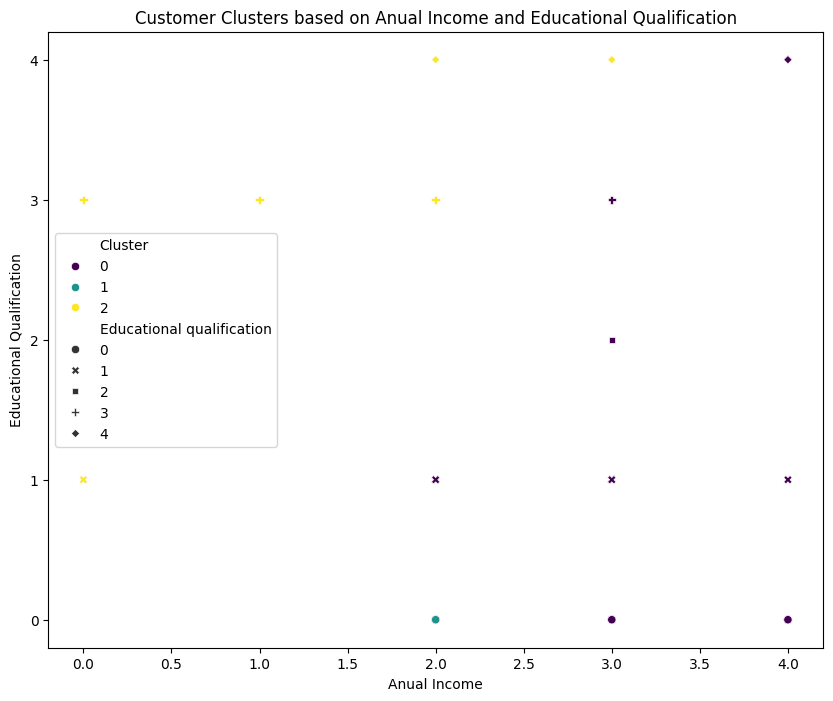

In [ ]:

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Anual income', y='Educational qualification', hue='Cluster', style='Educational qualification', palette='viridis')
plt.title('Customer Clusters based on Anual Income and Educational Qualification')
plt.xlabel('Anual Income')
plt.ylabel('Educational Qualification')
plt.yticks(ticks=sorted(df['Educational qualification'].unique()), labels=sorted(df['Educational qualification'].unique())) # Ensure all qualification levels are shown on y-axis
plt.show()

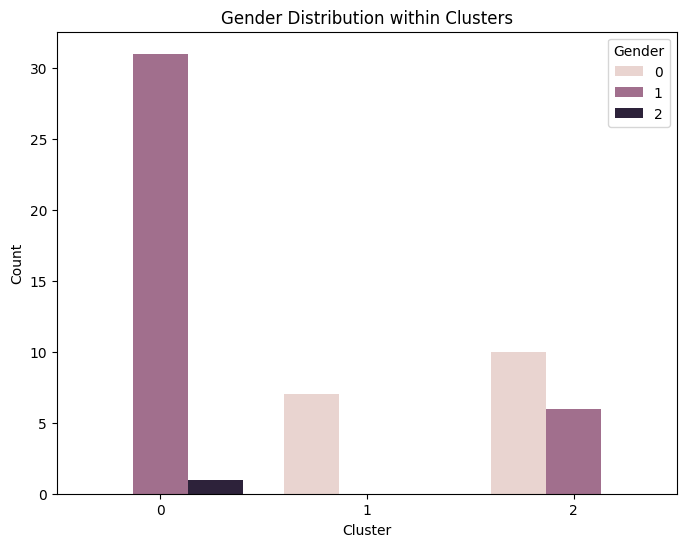

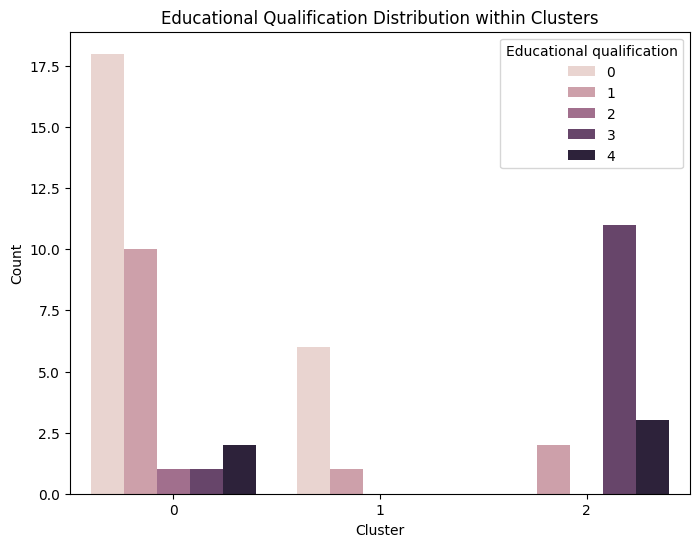

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Cluster', hue='Gender')
plt.title('Gender Distribution within Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Cluster', hue='Educational qualification')
plt.title('Educational Qualification Distribution within Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

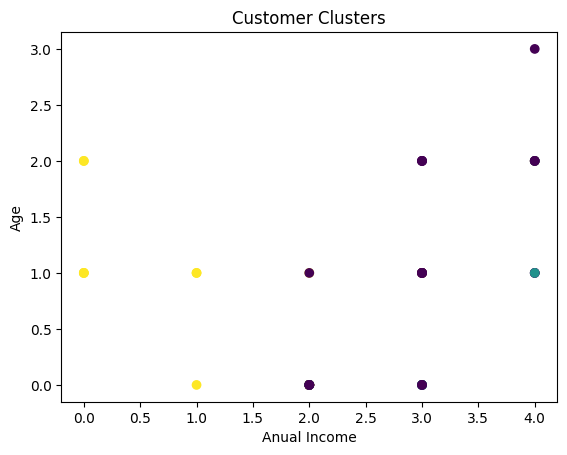

In [ ]:
plt.scatter(df['Anual income'], df['Age'], c=df['Cluster'], cmap='viridis')
plt.title('Customer Clusters')
plt.xlabel('Anual Income')
plt.ylabel('Age')
plt.show()